In [7]:
def node1(input1):
    return f"Hello from: {input1}\n"

def node2(input2):
    return f"Output of Node-1: {input2} and Hello from Node-2\n"

In [8]:
from langgraph.prebuilt import ToolNode
from langgraph.graph import END, START, Graph

workflow = Graph()

workflow.add_node("Node-1", node1)
workflow.add_node("Node-2", node2)

workflow.add_edge(START, "Node-1")
workflow.add_edge("Node-1", "Node-2")
workflow.add_edge("Node-2", END)

basic_graph = workflow.compile()

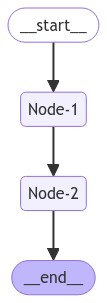

In [9]:
from IPython.display import Image, display

try:
    display(Image(basic_graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

In [10]:
for output in basic_graph.stream("Node-1"):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"'{key}':")
        print("---")
        print(value)
    print("\n~~~~~~~~\n")

'Node-1':
---
Hello from: Node-1


~~~~~~~~

'Node-2':
---
Output of Node-1: Hello from: Node-1
 and Hello from Node-2


~~~~~~~~

